# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [1]:
#install spacy in the current conda environment
!pip install spacy


  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached typer-0.12.5-py3-none-any.whl.metadata (15 kB)
  Using cached langcodes-3.4.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.2.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached cloudpathlib-0.19.0-py3-none-any.whl.metadata (14 kB)
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.1 MB 3.4 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/12.1 MB 4.0 MB/s eta 0:00:03
   ------ ----------------------------

In [2]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm



     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ----------------------------- ---------- 9.4/12.8 MB 53.3 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 42.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [33]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")
uiuc=pd.read_csv("uiuc.csv")

In [5]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \r\nMatter \r\nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [34]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [35]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
uiuc['cleaned_text'] = uiuc['text'].apply(clean)

In [36]:
#we can see the first comment after cleaning vs before
uiuc["cleaned_text"][0]

'have the same professor and in lecture he did say we were gonna have to learn some of the stuff ourself i would recommend using online resources such as pauls online math notes and professor leonard on youtube personally ive been learning the material from those sources before going to lecture'

In [37]:
uiuc["text"][0]

'Have the same professor! And in lecture he did say we were gonna have to learn some of the stuff ourself\xa0\r\n\r\nI would recommend using online resources such as Paul’s Online Math Notes and Professor Leonard on YouTube. Personally, I’ve been learning the material from those sources before going to lecture'

In [38]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(uiuc['cleaned_text'])

In [39]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<4725x10109 sparse matrix of type '<class 'numpy.int64'>'
	with 98566 stored elements in Compressed Sparse Row format>

In [40]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aaa,aaaaah,aaabb,ab,abandoned,abcc,abide,abilities,ability,...,zombie,zone,zones,zoo,zoom,zoomed,봉사를,세계로,숭실,진리와
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the                                                                                                       4613
to                                                                                                        3629
and                                                                                                       2973
you                                                                                                       2551
of                                                                                                        1854
                                                                                                          ... 
httpswwwwciacomnewsraresquirrelmemorializedonuoficampus                                                      1
httpswwwurbanaillinoisussitesdefaultfilesattachmentslandlordtenantpdf                                        1
httpswwwuoficreditunionorgcreditcreditcardshttpswwwuoficreditunionorgcreditcreditcards                       1
h

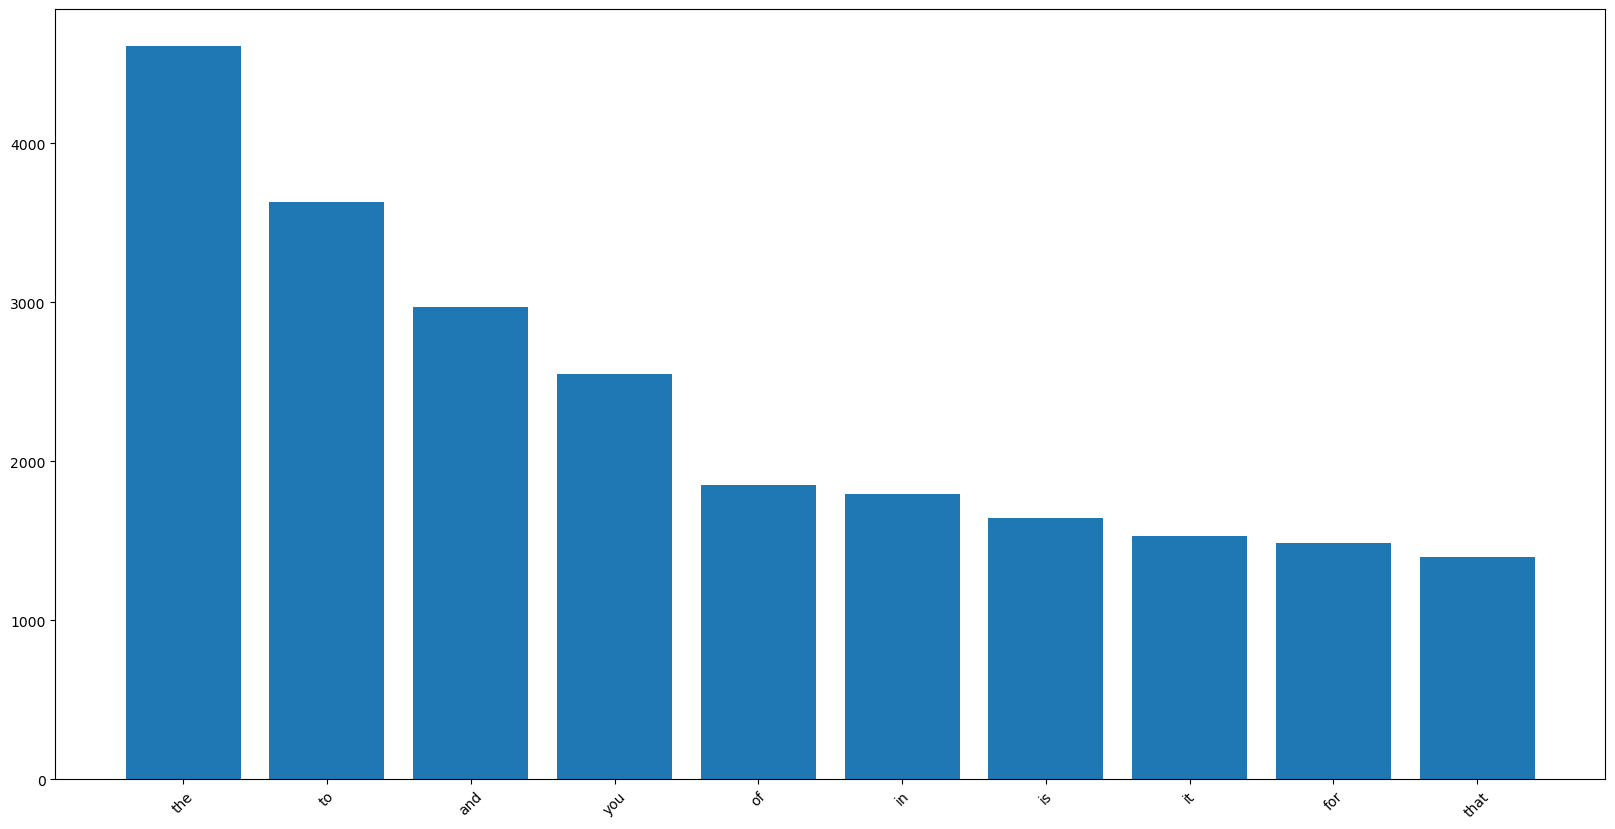

In [42]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: These words do not contribute to the semantic value of texts as they are common words seen in most sentences. This is useful only in looking for which words to exclude from data mining/topic modleing.

#### Lemmatization and stopword removal

In [15]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [43]:
#we can further process the text by removing stopwords and lemmatizing
uiuc['lemmatized_text'] = uiuc['cleaned_text'].apply(lemmatize)

In [48]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(uiuc['lemmatized_text'])

KeyError: 'lemmatized_text'

In [18]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8637 sparse matrix of type '<class 'numpy.int64'>'
	with 126833 stored elements in Compressed Sparse Row format>

In [19]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not               2862
student           1183
like              1183
people            1124
class              988
                  ... 
sell minnesota       3
cred                 3
credential           3
sell oregon          3
pay dollar           3
Length: 8637, dtype: int64

In [20]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

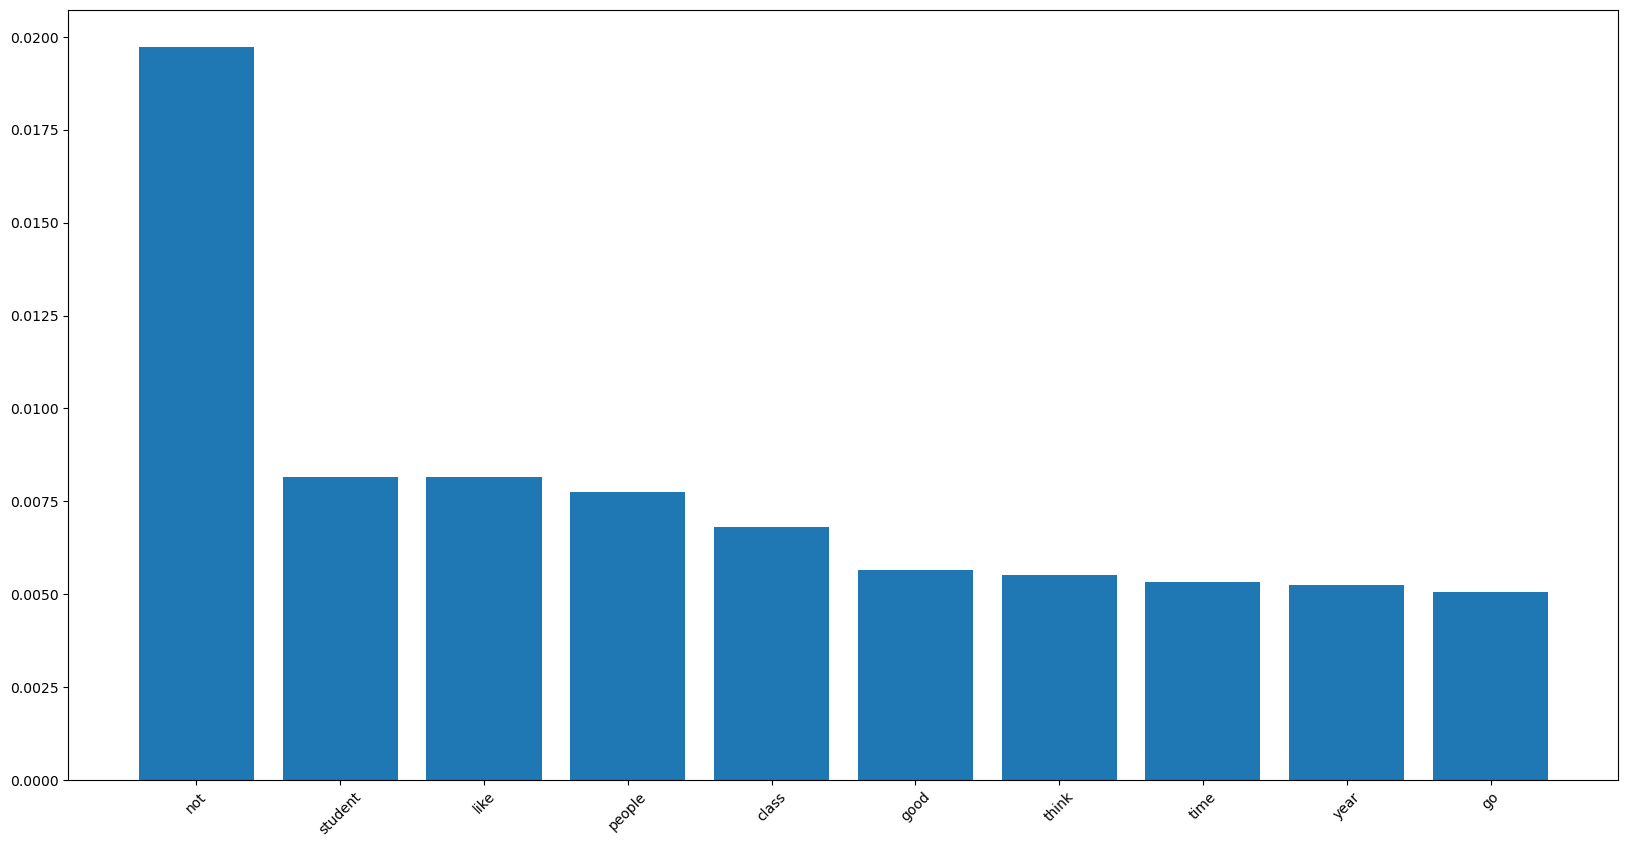

In [21]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [22]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

4.138501862325838e-05

In [31]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000034
cs                  0.001228
computer            0.000262
dtype: float64

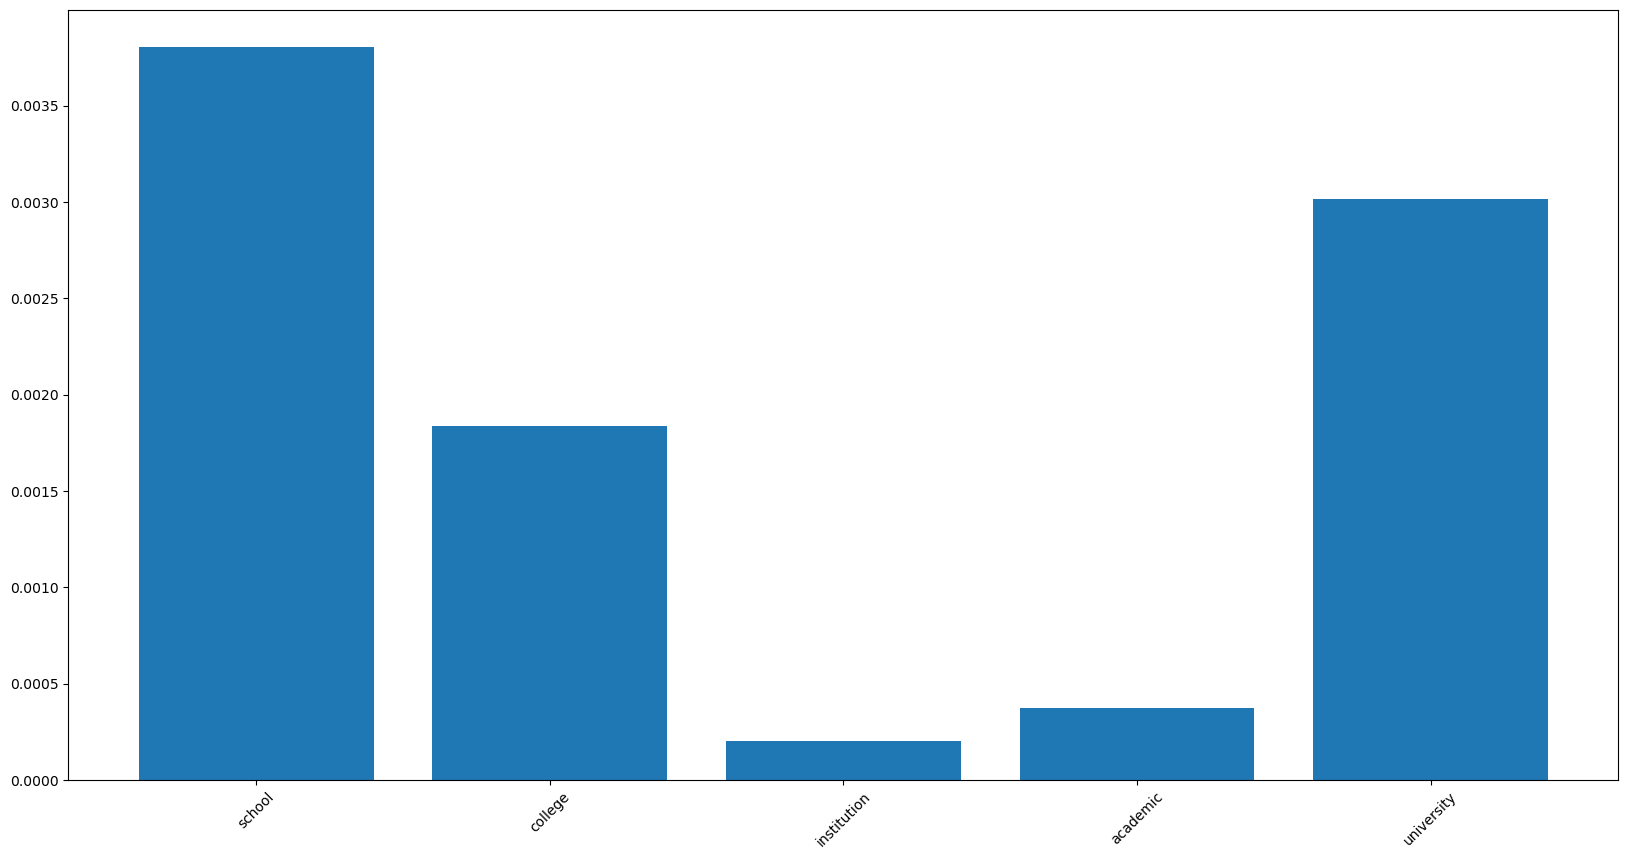

In [27]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [29]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 
plot_list=word_counts[["academic", "educational", "institution", "college", "university"]]
plot_list

academic       0.000372
educational    0.000028
institution    0.000200
college        0.001835
university     0.003014
dtype: float64

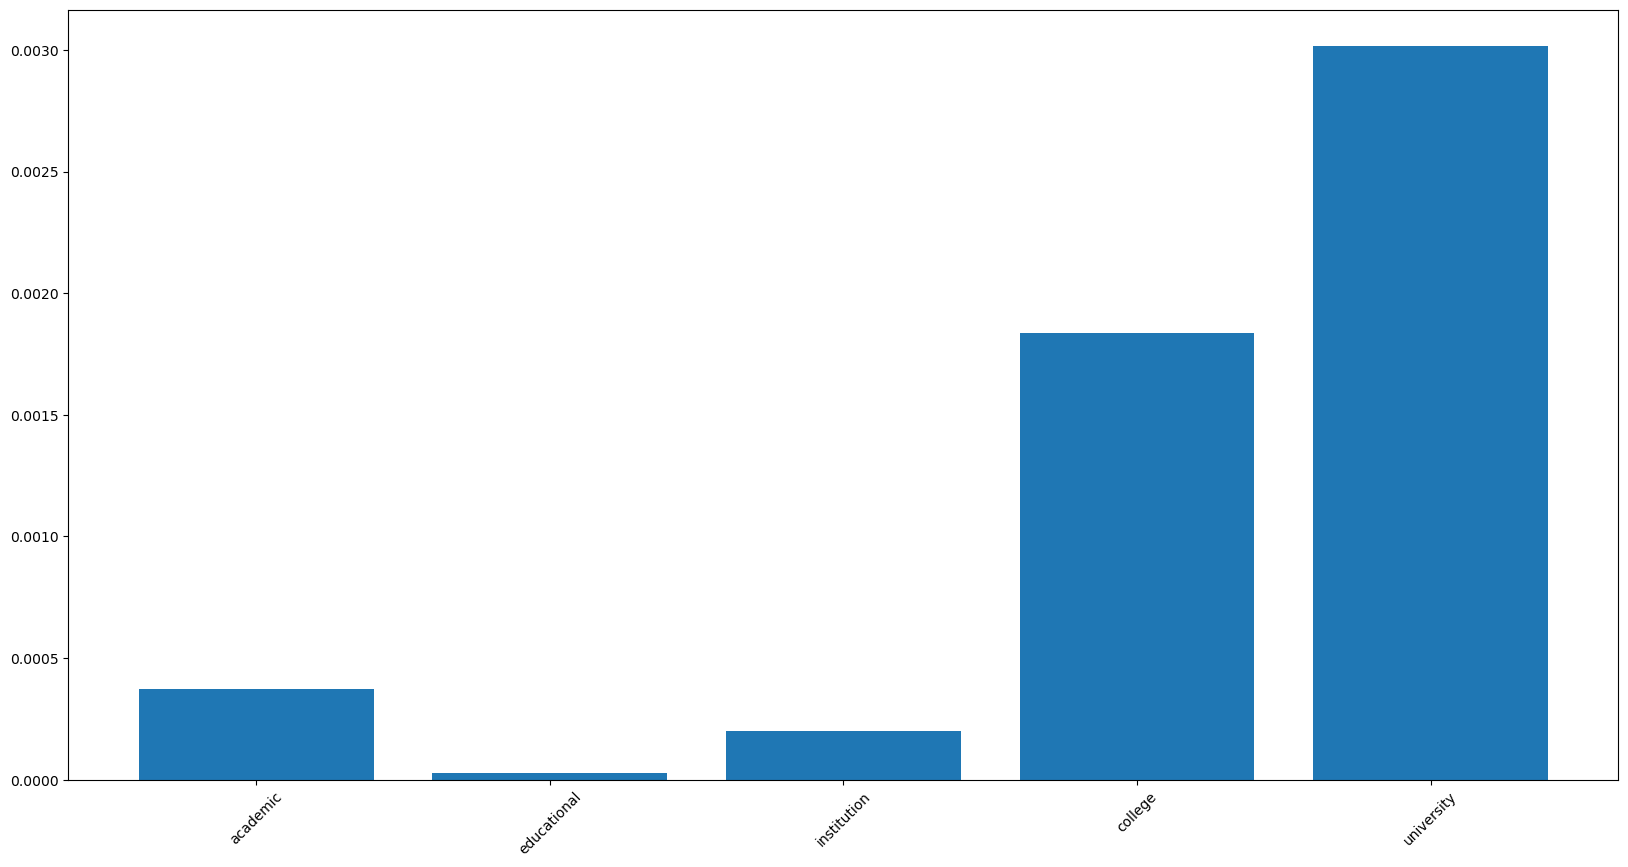

In [30]:
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

In [32]:
uiuc=pd.read_csv("uiuc.csv")


The words have surprisingly similar usage across both subreddits. However the word 'Educational' was used far more in umich.

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [46]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [51]:
#clean and lemmatize the data csv
data['cleaned_text'] = data['text'].apply(clean)
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)
data

,Unnamed: 0,date,post_votes,text,user,com_votes,label,cleaned_text,lemmatized_text
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2,1,have the same professor and in lecture he did ...,professor lecture go to learn stuff ourself re...
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1,1,do you find it helpful to still go to the lect...,find helpful lecture slide embed mistake make ...
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2,1,have you tried emailing university housing to ...,try email university housing request access
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2,1,purchasing illini cash should get you added to...,purchase illini cash add nonresident meal plan...
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1,1,just did thanks for the suggestion it hadnt oc...,thank suggestion not occur
...,...,...,...,...,...,...,...,...,...
8226,8226,2024-07-03 21:43:36,1,No \r\n\r\nhttps://ltp.umich.edu/2024/06/26/ju...,mgoreddit,4,0,no httpsltpumichedujulyholidayparkingandtransp...,httpsltpumichedujulyholidayparkingandtransport...
1443,1443,2024-08-28 19:34:40,5,Same,CCCOrange,3,0,same,
3337,3337,2024-08-20 15:40:42,3,"Knowing how it all works a bit helps, cuz it d...",tylerfioritto,2,0,knowing how it all works a bit helps cuz it de...,know work bit help cuz def scary not detroit u...
6295,6295,2024-07-19 21:10:08,11,Get to the stop a bus early because you will h...,Strong-Second-2446,1,0,get to the stop a bus early because you will h...,stop bus early fight like gladiator spot crowd


In [52]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(data['lemmatized_text'])

In [63]:
#train a logistic regression model using the bag of words features as X and the label column as y
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = bag_of_words
Y = data['label']

model = LogisticRegression(max_iter=1000) 
model.fit(X, Y)

Y_pred = model.predict(X)


In [64]:
#report the accuracy of the model
accuracy = accuracy_score(Y, Y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(Y, Y_pred))


Accuracy: 0.9058
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      4725
           1       0.87      0.95      0.91      4725

    accuracy                           0.91      9450
   macro avg       0.91      0.91      0.91      9450
weighted avg       0.91      0.91      0.91      9450




#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000) 
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(Y_test, Y_pred))

Accuracy: 0.7222
              precision    recall  f1-score   support

           0       0.75      0.67      0.70       941
           1       0.70      0.78      0.74       949

    accuracy                           0.72      1890
   macro avg       0.72      0.72      0.72      1890
weighted avg       0.72      0.72      0.72      1890



#### Part 3: Examine the top features of your model using the following code

In [67]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?


In [70]:
feature_names = vectorizer.get_feature_names_out()
coefficients = pd.DataFrame({'feature': feature_names, 'coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)
top_10_positive

,feature,coefficient
7626,uiuc,2.341969
3279,illinois,1.915332
2839,grainger,1.827042
6128,rsos,1.806276
1505,danville,1.741202
3276,illini,1.712423
7741,urbana,1.697484
926,champaign,1.623566
2873,green,1.551611
3683,las,1.546297


In [72]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?


Most all of the top 10 positive coefficients are words related to UIUC and most all of the top 10 negative coefficients are words related to UMich.

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 